# Use Clustering Techniques for the any customer dataset using machine learning

### For this problem, we're going to use K-Means clustering techniques.

## K-Means:
### The way kmeans algorithm works is as follows:
    Specify number of clusters K.
    
    Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    
    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
    
    Compute the sum of the squared distance between data points and all centroids.
    
    Assign each data point to the closest cluster (centroid).
    
    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

## K-Means for Mall customers

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Clustering Techniques/Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [10]:
df1 = df.drop(['CustomerID', 'Gender','Age'], axis=1)

In [11]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
#df1['Gender'] = df1['Gender'].map({'Male':1,'Female':0})

In [13]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 4.7 KB


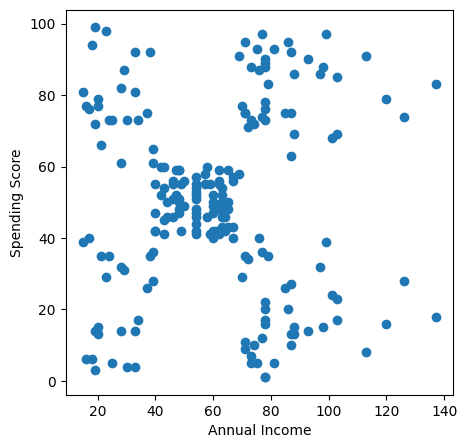

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(df1.iloc[:,0], df1.iloc[:, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [16]:
# plt.figure(figsize=(5,5))
# plt.scatter(df1['Age'], df1.iloc[:,2])
# plt.xlabel('Age')
# plt.ylabel('Annual Income (k$)')
# plt.show()

In [17]:
df1.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [18]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3-q1

(df1<(q1-(1.5*iqr))| (df1>(q3+(1.5*iqr)))).sum()


Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# df1.iloc[:,1:4].describe()

### Scaling the DATA

In [20]:
ss = StandardScaler()

x_std = ss.fit_transform(df1)

### Applying KMeans clustering techniques

Fit the Data, Identifying pattern, Does Everything

In [21]:
km = KMeans(n_clusters=2)
km.fit(x_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

### Final Centeriod Points

In [22]:
centeriods = km.cluster_centers_
centeriods

array([[-0.01389068,  0.79226432],
       [ 0.01445765, -0.82460164]])

### Measures how tight my groups are

In [23]:
km.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [24]:
km.inertia_

269.29934286898697

## Plot the clustered data

Text(0.5, 1.0, 'Visualize the Clustered Data')

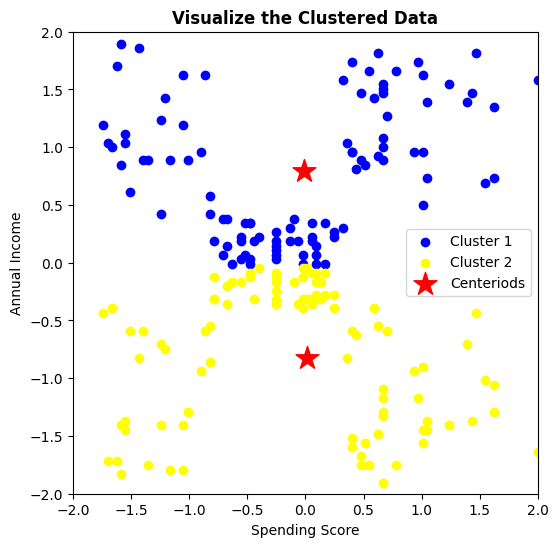

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x_std[km.labels_ == 0,0], x_std[km.labels_ == 0, 1], c='blue', label='Cluster 1')
plt.scatter(x_std[km.labels_ == 1,0], x_std[km.labels_ == 1, 1], c='yellow', label='Cluster 2')
plt.scatter(centeriods[:,0], centeriods[:,1], c='red', marker='*',s=300, label='Centeriods')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Visualize the Clustered Data', fontweight='bold')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.01389068  0.79226432]
 [ 0.01445765 -0.82460164]]
65.56840815571681


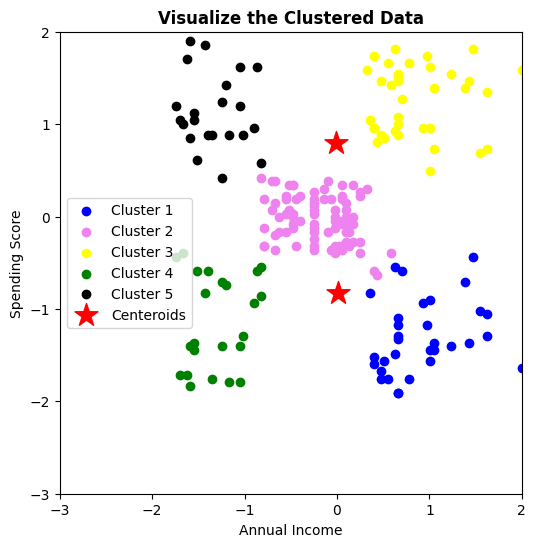

In [36]:
km1 = KMeans(n_clusters=5)
km1.fit(x_std)
center1 = km.cluster_centers_
print(center1)

km1.labels_
print(km1.inertia_)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x_std[km1.labels_ == 0,0], x_std[km1.labels_ == 0, 1], c='blue', label='Cluster 1')
plt.scatter(x_std[km1.labels_ == 1,0], x_std[km1.labels_ == 1, 1], c='violet', label='Cluster 2')
plt.scatter(x_std[km1.labels_ == 2,0], x_std[km1.labels_ == 2, 1], c='yellow', label='Cluster 3')
plt.scatter(x_std[km1.labels_ == 3,0], x_std[km1.labels_ == 3, 1], c='green', label='Cluster 4')
plt.scatter(x_std[km1.labels_ == 4,0], x_std[km1.labels_ == 4, 1], c='black', label='Cluster 5')
plt.scatter(center1[:, 0], center1[:,1], marker='*', c='red',s=300, label='Centeroids')
plt.legend()

plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Visualize the Clustered Data', fontweight='bold')
ax.set_aspect('equal');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


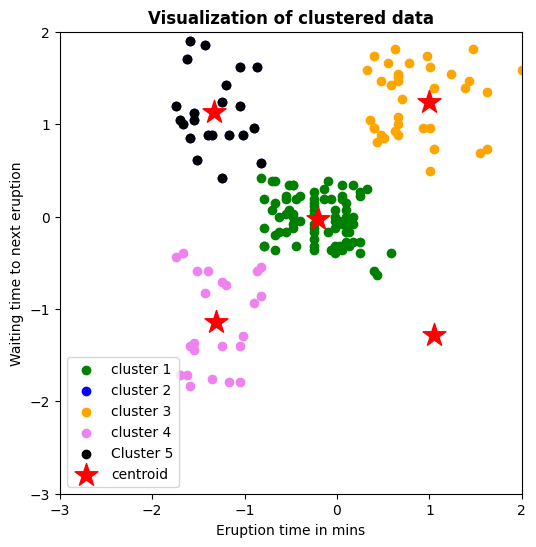

In [38]:
km = KMeans(n_clusters=5) # k = 4
km.fit(x_std)
centroids = km.cluster_centers_
#centroids
km.inertia_ # measures how tight my clusters are -> lower the better (lower => the clusters are more tight)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(x_std[km.labels_ == 0, 0], x_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(x_std[km.labels_ == 1, 0], x_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(x_std[km.labels_ == 2, 0], x_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(x_std[km.labels_ == 3, 0], x_std[km.labels_ == 3, 1],
            c='violet', label='cluster 4')
plt.scatter(x_std[km1.labels_ == 4,0], x_std[km1.labels_ == 4, 1],
            c='black', label='Cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

## Determining K

## Using Elbow Method

In [39]:
# Elbow Plot
# We make a plot between x and inertias

inertias = []
list_k = list(range(1,10))

for k in list_k:
  km1 = KMeans(n_clusters=k)
  km1.fit(x_std)
  cluster_labels = km1.predict(x_std)
  inertias.append(km1.inertia_)
#print(inertias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

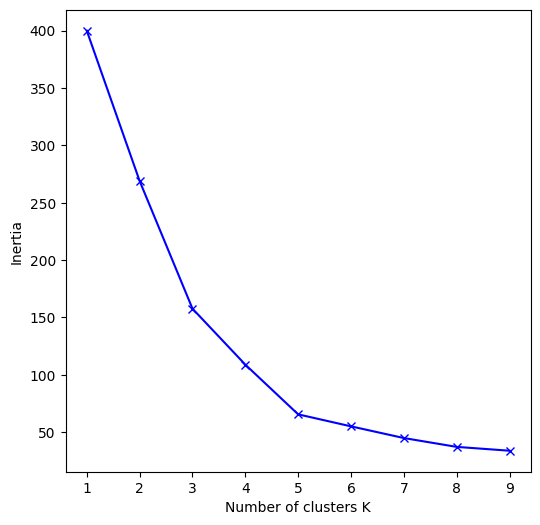

In [40]:
plt.figure(figsize=(6,6))
plt.plot(list_k, inertias, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


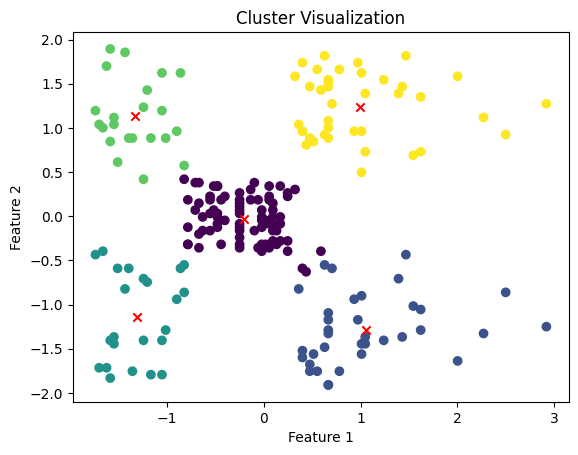

Average silhouette score: 0.5546571631111091


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in the 'data' variable

# Finding the optimal number of clusters using the elbow method
# sse = []
# k_values = range(1, 11)  # Testing K values from 1 to 10
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     clst_label = kmeans.fit_predict(x_std)
#     silhouette_avg1 = silhouette_score(x_std, clst_label, metric='euclidean')
#     sse.append(kmeans.inertia_)
#     print(f'For K= {k}, the average silhouette score is {silhouette_avg1}')

# Plotting the elbow curve
# plt.plot(k_values, sse, 'bx-')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Sum of Squared Errors (SSE)')
# plt.title('Elbow Method for Optimal K')
# plt.show()

# Using K-means with the optimal K value of 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x_std)

# Visualizing the clusters
# Assuming you have 2-dimensional data for visualization
plt.scatter(x_std[:, 0], x_std[:, 1], c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Using the clusters for analysis or decision-making
# Utilize the identified clusters for further analysis or decision-making tasks
# Perform any desired analysis or decision-making using the identified clusters

# Assigning data points to clusters
cluster_labels = kmeans.predict(x_std)

# Evaluating cluster quality
silhouette_avg = silhouette_score(x_std, cluster_labels, metric='euclidean')
print(f"Average silhouette score: {silhouette_avg}")


In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate sample data for clustering
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform K-means clustering with different values of K
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(x_std)
    silhouette_avg = silhouette_score(x_std, cluster_labels)
    print(f"For K={k}, the average silhouette score is: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K=2, the average silhouette score is: 0.3146990432802128
For K=3, the average silhouette score is: 0.46658474419000145
For K=4, the average silhouette score is: 0.4939069237513199
For K=5, the average silhouette score is: 0.5546571631111091


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Working with all Number of customers we can see the value of K=5 is the slightly more value of 0.5. So we've to use that model only.